<a href="https://colab.research.google.com/github/maielhadad99/TECHIS-JS-A-MAI/blob/main/Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [15]:
data=pd.read_csv('/content/astro_data.csv')
data

,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,state,city
0,06:14 AM,05:55 PM,02:53 PM,01:17 AM,First Quarter,61,Andhra Pradesh,Amaravati
1,05:50 AM,05:35 PM,02:24 PM,01:00 AM,First Quarter,61,Andhra Pradesh,Visakhapatnam
2,06:00 AM,05:47 PM,02:34 PM,01:14 AM,First Quarter,61,Andhra Pradesh,Vijayawada
3,06:01 AM,05:47 PM,02:34 PM,01:15 AM,First Quarter,61,Andhra Pradesh,Guntur
4,06:01 AM,05:50 PM,02:33 PM,01:20 AM,First Quarter,61,Andhra Pradesh,Nellore
...,...,...,...,...,...,...,...,...
1227,05:41 AM,05:02 PM,06:10 PM,06:56 AM,Waxing Gibbous,88,West Bengal,Darjeeling
1228,06:27 AM,05:44 PM,06:52 PM,07:45 AM,Waxing Gibbous,88,West Bengal,Siliguri
1229,05:43 AM,05:10 PM,06:21 PM,06:57 AM,Waxing Gibbous,88,West Bengal,Asansol
1230,05:37 AM,05:06 PM,06:17 PM,06:50 AM,Waxing Gibbous,88,West Bengal,Howrah


In [16]:
data['test']=data['moon_illumination']

In [17]:
data.columns

Index(['sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase',
       'moon_illumination', 'state', 'city', 'test'],
      dtype='object')

In [18]:
data.sample()

,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,state,city,test
246,05:37 AM,05:24 PM,06:36 PM,06:42 AM,Waxing Gibbous,88,Goa,Mapusa,88


In [19]:
data=pd.read_csv('/content/forecast_data.csv')
data

,time_epoch,time,temp_c,temp_f,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feelslike_c,feelslike_f,windchill_c,windchill_f,heatindex_c,heatindex_f,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,state,city
0,1634236200,2021-10-15 00:00,23.2,73.8,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.3,6.8,41,NE,1006.0,29.69,0.0,0.0,67,5,25.1,77.2,23.2,73.8,25.1,77.2,16.7,62.1,0,0,0,0,10.0,6.0,8.9,14.4,Andhra Pradesh,Amaravati
1,1634239800,2021-10-15 01:00,23.0,73.3,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.1,6.6,34,NE,1005.0,29.68,0.0,0.0,67,6,25.0,77.0,23.0,73.3,25.0,77.0,16.5,61.8,0,0,0,0,10.0,6.0,8.6,13.9,Andhra Pradesh,Amaravati
2,1634243400,2021-10-15 02:00,22.7,72.9,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.0,6.4,28,NNE,1005.0,29.67,0.0,0.0,67,8,24.9,76.8,22.7,72.9,24.9,76.8,16.4,61.5,0,0,0,0,10.0,6.0,8.4,13.4,Andhra Pradesh,Amaravati
3,1634247000,2021-10-15 03:00,22.5,72.5,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.8,6.1,22,NNE,1005.0,29.66,0.0,0.0,67,10,24.8,76.6,22.5,72.5,24.8,76.6,16.2,61.2,0,0,0,0,10.0,6.0,8.1,13.0,Andhra Pradesh,Amaravati
4,1634250600,2021-10-15 04:00,22.3,72.1,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.7,6.0,23,NNE,1005.0,29.68,0.0,0.0,68,10,24.7,76.5,22.3,72.1,24.7,76.5,16.1,61.0,0,0,0,0,10.0,6.0,7.9,12.7,Andhra Pradesh,Amaravati
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29563,1634909400,2021-10-22 19:00,25.7,78.3,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.0,4.8,334,NNW,1010.0,29.84,0.0,0.0,61,2,27.0,80.7,25.7,78.3,27.0,80.7,17.6,63.7,0,0,0,0,10.0,6.0,6.0,9.7,West Bengal,Durgapur
29564,1634913000,2021-10-22 20:00,24.8,76.6,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.1,4.9,342,NNW,1011.0,29.85,0.0,0.0,63,1,26.3,79.3,24.8,76.6,26.3,79.3,17.2,62.9,0,0,0,0,10.0,6.0,6.3,10.1,West Bengal,Durgapur
29565,1634916600,2021-10-22 21:00,23.9,75.0,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.1,5.0,351,N,1012.0,29.87,0.0,0.0,64,0,25.5,77.9,23.9,75.0,25.5,77.9,16.7,62.1,0,0,0,0,10.0,6.0,6.5,10.4,West Bengal,Durgapur
29566,1634920200,2021-10-22 22:00,23.3,74.0,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",2.8,4.4,237,WSW,1012.0,29.87,0.0,0.0,68,1,25.2,77.4,23.3,74.0,25.2,77.4,17.1,62.8,0,0,0,0,10.0,6.0,5.7,9.2,West Bengal,Durgapur


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29568 entries, 0 to 29567
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time_epoch      29568 non-null  int64  
 1   time            29568 non-null  object 
 2   temp_c          29568 non-null  float64
 3   temp_f          29568 non-null  float64
 4   is_day          29568 non-null  int64  
 5   condition       29568 non-null  object 
 6   wind_mph        29568 non-null  float64
 7   wind_kph        29568 non-null  float64
 8   wind_degree     29568 non-null  int64  
 9   wind_dir        29568 non-null  object 
 10  pressure_mb     29568 non-null  float64
 11  pressure_in     29568 non-null  float64
 12  precip_mm       29568 non-null  float64
 13  precip_in       29568 non-null  float64
 14  humidity        29568 non-null  int64  
 15  cloud           29568 non-null  int64  
 16  feelslike_c     29568 non-null  float64
 17  feelslike_f     29568 non-null 

In [21]:
data.time=pd.to_datetime(data["time"])

In [22]:
data.columns

Index(['time_epoch', 'time', 'temp_c', 'temp_f', 'is_day', 'condition',
       'wind_mph', 'wind_kph', 'wind_degree', 'wind_dir', 'pressure_mb',
       'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud',
       'feelslike_c', 'feelslike_f', 'windchill_c', 'windchill_f',
       'heatindex_c', 'heatindex_f', 'dewpoint_c', 'dewpoint_f',
       'will_it_rain', 'chance_of_rain', 'will_it_snow', 'chance_of_snow',
       'vis_km', 'vis_miles', 'gust_mph', 'gust_kph', 'state', 'city'],
      dtype='object')

In [23]:
data=data.drop(["time",'chance_of_snow','will_it_snow','temp_f','condition','wind_mph','pressure_in','precip_in','wind_dir','feelslike_f','windchill_f','heatindex_f','dewpoint_f','chance_of_rain','vis_miles','gust_mph'],axis=1) 

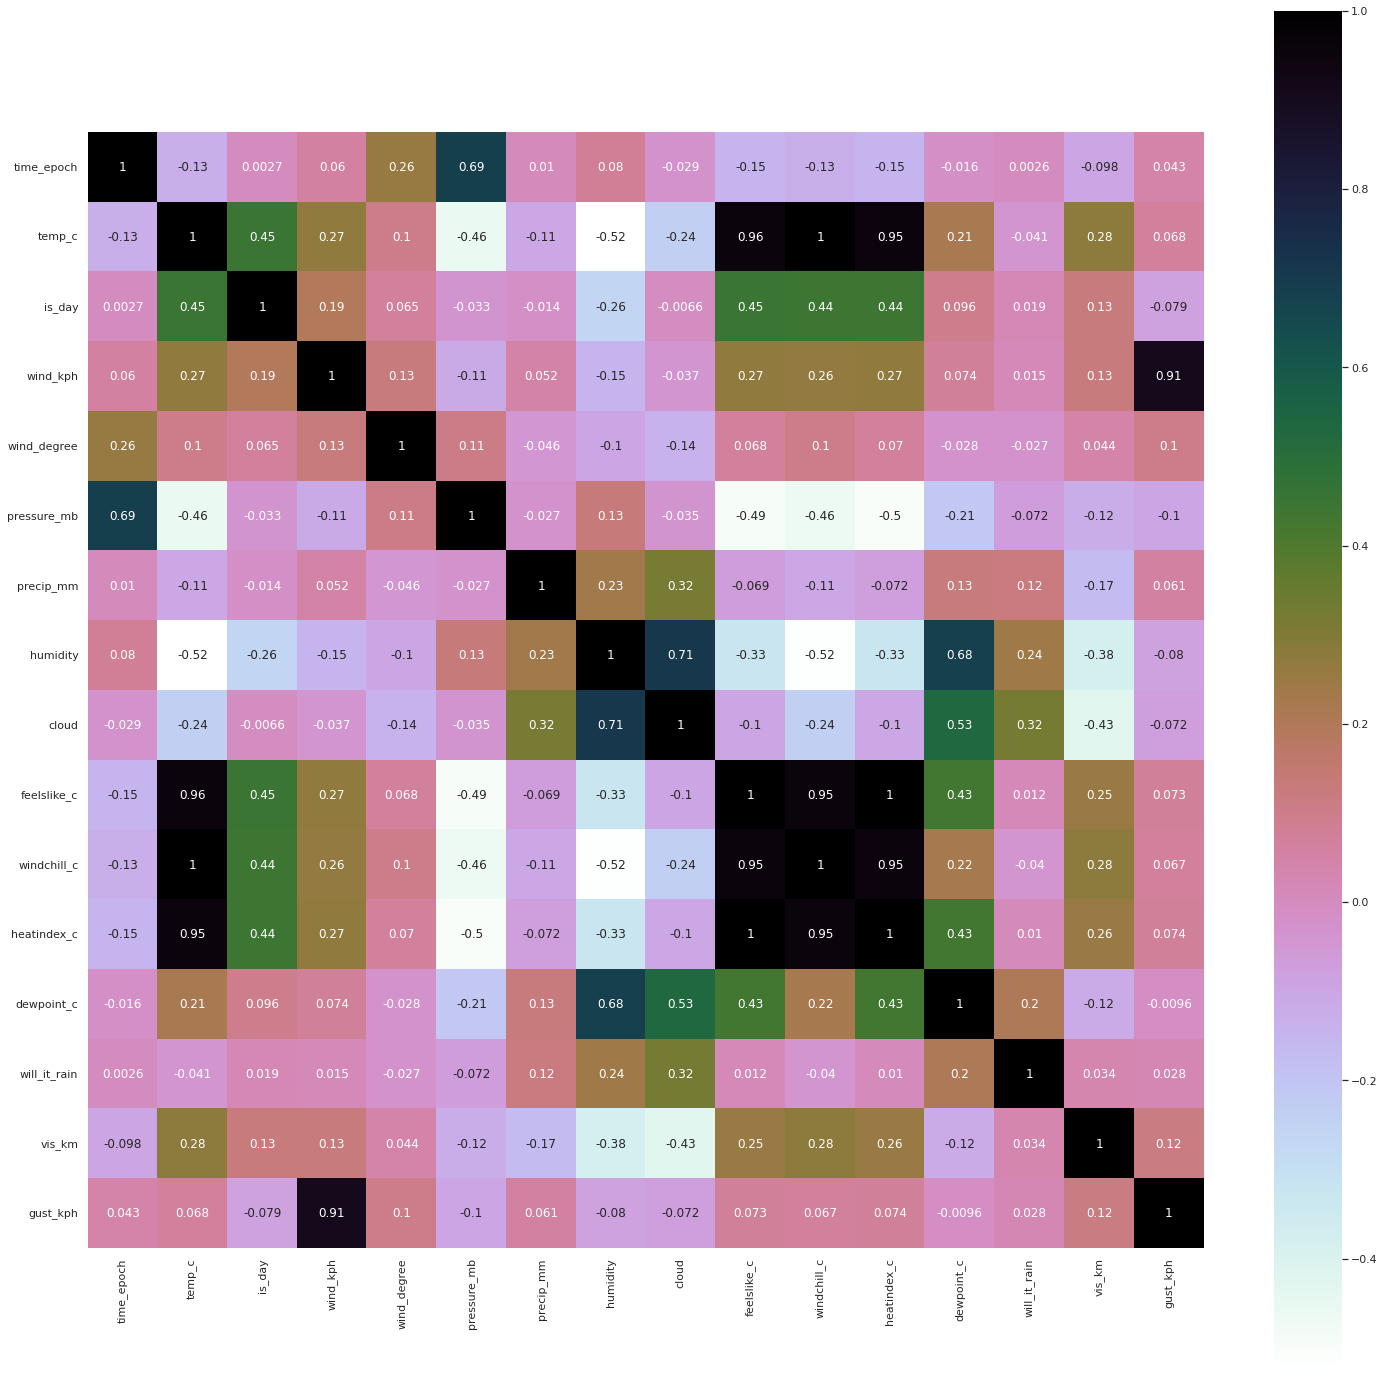

In [26]:
# Heatmap
corr=data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True,cmap='cubehelix_r',square=True)
plt.show()

In [25]:
#checking the objects
data.select_dtypes(include='object')


,state,city
0,Andhra Pradesh,Amaravati
1,Andhra Pradesh,Amaravati
2,Andhra Pradesh,Amaravati
3,Andhra Pradesh,Amaravati
4,Andhra Pradesh,Amaravati
...,...,...
29563,West Bengal,Durgapur
29564,West Bengal,Durgapur
29565,West Bengal,Durgapur
29566,West Bengal,Durgapur


In [27]:
#converting the categrocals
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
data['state']=en.fit_transform(data['state'])
data['city']=en.fit_transform(data['city'])

In [28]:
#splitting the dataset for training and testing
from sklearn.model_selection import train_test_split
train, test=train_test_split(data,test_size=0.25)

In [30]:
X_train=train.drop(['will_it_rain'],axis=1)
y_train=train['will_it_rain']
X_test=test.drop(['will_it_rain'],axis=1)
y_test=test['will_it_rain']

In [31]:
# applying Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
LR=model.score(X_test,y_test)
LR

0.9122023809523809

In [36]:
## applying Adaboost Ensemble algorithm
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X_test)
abcl_score=abcl.score(X_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(confusion_matrix(y_test,test_pred))

The Adaboost Ensemble model accuracy is 0.9381764069264069
The confusion matrix of Adaboost Ensemble model is
[[6496  247]
 [ 210  439]]
